<a href="https://colab.research.google.com/github/Anurag-Tendulkar/Machine-Learning-Term-Project-/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Logistic Map


In [ ]:
import math
import random
import statistics
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from collections import Counter
from scipy import linalg

# logistic function
def logistic (R, x0, N):    
    x = x0
    x_list = [x0]
    for i in range(N-1):      
        x = R * x * (1. - x)
        x_list.append(x)
    return x_list

In [ ]:
x = logistic(4.0, 0.2, 120 )
print(x)
#x is the time-series data


[0.2, 0.6400000000000001, 0.9215999999999999, 0.28901376000000045, 0.8219392261226504, 0.585420538734196, 0.970813326249439, 0.11333924730375745, 0.40197384929750063, 0.9615634951138035, 0.14783655991331973, 0.5039236458652606, 0.9999384200124961, 0.00024630478163611714, 0.0009849764623626413, 0.003936025134924932, 0.015682131364248682, 0.06174480848049252, 0.23172954842479926, 0.7121238592465515, 0.8200138733533968, 0.5903644834454244, 0.9673370405265665, 0.12638436220748117, 0.44164542078755753, 0.9863789723397551, 0.05374198106289484, 0.20341512213732119, 0.6481496408927195, 0.912206735613433, 0.3203424284596693, 0.8708926279529239, 0.44975463412069594, 0.9899016128306195, 0.03998563898383115, 0.1535471506355435, 0.5198816926689969, 0.9984188731864623, 0.00631450740614895, 0.02509853760946656, 0.09787440407733101, 0.35318002041535335, 0.9137755743790558, 0.31515909618912996, 0.8633353611135227, 0.4719496614580242, 0.9968527140307222, 0.012549522241221646, 0.049568126930954914, 0.188

In [ ]:
#Embedding matrix
E = np.zeros((5,3))
for i in range (3):
  E[:,i] = x[i:i+5]

print(E)

[[0.2        0.64       0.9216    ]
 [0.64       0.9216     0.28901376]
 [0.9216     0.28901376 0.82193923]
 [0.28901376 0.82193923 0.58542054]
 [0.82193923 0.58542054 0.97081333]]


SVD on Embedding matrix does not give any singular values as shown below

In [ ]:
U, D, VT = np.linalg.svd(E)

diag_mat = np.diag(D)
print(diag_mat)

[[2.53876495 0.         0.        ]
 [0.         0.73011928 0.        ]
 [0.         0.         0.57800526]]


In [ ]:
#Augmenting the matrix to get F
new_values = (E[:,0])**2
F = np.zeros((5,4))

for i in range (3):
  F[:,i] = E[:,i]

F[:,3] = new_values[0:5]
print(F)


[[0.2        0.64       0.9216     0.04      ]
 [0.64       0.9216     0.28901376 0.4096    ]
 [0.9216     0.28901376 0.82193923 0.84934656]
 [0.28901376 0.82193923 0.58542054 0.08352895]
 [0.82193923 0.58542054 0.97081333 0.67558409]]


In [ ]:
U, D, VT = np.linalg.svd(F)

diag_mat = np.diag(D)
print(diag_mat)
print("\n")

# get dim of X
W = np.zeros((F.shape[0], F.shape[1]))
# populate Sigma with n x n diagonal matrix
W[:F.shape[1], :F.shape[1]] = np.diag(D)
print(W)

[[2.73071324e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.08301537e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.20353073e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.09372104e-16]]


[[2.73071324e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.08301537e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.20353073e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.09372104e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [ ]:
#preset criterion is 10^-6
p = F.shape[1]
if W[p-1, p-1]/W[0,0] < 10**(-6):
  W[p-1, p-1] = 0

In [ ]:
print(W)

[[2.73071324 0.         0.         0.        ]
 [0.         0.90830154 0.         0.        ]
 [0.         0.         0.62035307 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


In [ ]:
print(VT)

[[-5.02833544e-01 -5.00672880e-01 -5.94856283e-01 -3.77665324e-01]
 [-4.03667134e-01  6.98642877e-01  1.20365560e-01 -5.78327854e-01]
 [ 3.15218634e-01  4.80543199e-01 -7.94769233e-01  1.95082834e-01]
 [ 6.96310624e-01 -1.74077656e-01 -3.33066907e-16 -6.96310624e-01]]


Since W4,4 = 0, we take 4th row of VT as the coefficients of the equation (for parameter extraction)

In [ ]:
if W[p-1, p-1] == 0:
  print(VT[p-1, :])

[ 6.96310624e-01 -1.74077656e-01 -3.33066907e-16 -6.96310624e-01]


6.96310624e-01 Xn - 1.74077656e-01 Xn+1 + 0 Xn+2 - 6.96310624e-01 Xn^2 = 0

---


=> 4Xn - Xn+1 - 4Xn^2 = 0

---


=> Xn+1 = 4Xn(1 - Xn)


---
The parameter R is correctly estimated as 4


####Comparison of Non linear SVD with standard SVD and surrogates


In [ ]:
x = logistic(4.0, 0.2, 120 )
print(x)


[0.2, 0.6400000000000001, 0.9215999999999999, 0.28901376000000045, 0.8219392261226504, 0.585420538734196, 0.970813326249439, 0.11333924730375745, 0.40197384929750063, 0.9615634951138035, 0.14783655991331973, 0.5039236458652606, 0.9999384200124961, 0.00024630478163611714, 0.0009849764623626413, 0.003936025134924932, 0.015682131364248682, 0.06174480848049252, 0.23172954842479926, 0.7121238592465515, 0.8200138733533968, 0.5903644834454244, 0.9673370405265665, 0.12638436220748117, 0.44164542078755753, 0.9863789723397551, 0.05374198106289484, 0.20341512213732119, 0.6481496408927195, 0.912206735613433, 0.3203424284596693, 0.8708926279529239, 0.44975463412069594, 0.9899016128306195, 0.03998563898383115, 0.1535471506355435, 0.5198816926689969, 0.9984188731864623, 0.00631450740614895, 0.02509853760946656, 0.09787440407733101, 0.35318002041535335, 0.9137755743790558, 0.31515909618912996, 0.8633353611135227, 0.4719496614580242, 0.9968527140307222, 0.012549522241221646, 0.049568126930954914, 0.188

In [ ]:
F = np.zeros((21,21))
M = np.zeros((21,21))

for i in range (21):
  M[:,i] = x[i:i+21]

#print(M)

for i in range(11):
  F[:,i] = M[:,i]


for i in range(11,21):
  F[:,i] = M[:,i-11]*M[:,i-11]



Since we wil be using the SVD function over and over, we create a function to calculate SVD.


In [ ]:
#SVD function to be used for parameter 
#extraction and singular value calculation
def SVD_function(F):
  U, D, VT = np.linalg.svd(F)

  diag_mat = np.diag(D)


  # get dim of X
  W = np.zeros((F.shape[0], F.shape[1]))
  # populate Sigma with n x n diagonal matrix
  # we do this incase we have a non-square matrix (as in the first case where we had a 5x4 matrix)
  W[:F.shape[1], :F.shape[1]] = np.diag(D)
  #preset criterion is 10^-6
  p = F.shape[1]
  for i in range (p):
    if W[i, i]/W[0, 0] < 10**(-6):
      W[i, i] = 0
  
  return W, VT
    


In [ ]:

W, VT= SVD_function(F)
W_lin, VT_lin = SVD_function(M)
  

[0.0, 3.2720653012094685, 12.791925641241221, 26.471529263099313, 44.0839220412942, 64.78358767219216, 84.56140415354783, 75.04986797614518, 85.62668954336104, 100.07034010684511, 103.33406584976383, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


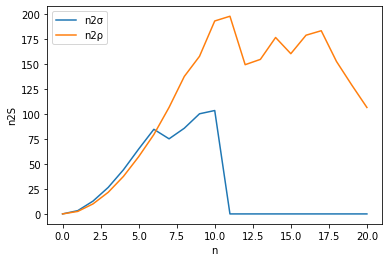

In [ ]:
plt_arr_lin = []
plt_arr = []
n_arr = []
for i in range (21):
  plt_arr_lin.append(W_lin[i,i]*(i**2))
  plt_arr.append(W[i,i]*(i**2))
  n_arr.append(i)
print(plt_arr)

plt.plot(n_arr, plt_arr, label='n2σ')
plt.plot(n_arr, plt_arr_lin, label='n2ρ')
leg = plt.legend(loc='upper left')
plt.xlabel('n')
plt.ylabel('n2S')
plt.show()

###Surrogates

We use Fourier Transform to calculate

In [ ]:
ts_fourier  = np.fft.rfft(x)
random_phases = np.exp(np.random.uniform(0,np.pi,len(x)//2+1)*1.0j)
ts_fourier_new = ts_fourier*random_phases
new_ts = np.fft.irfft(ts_fourier_new)
print(new_ts[:10])


[0.10704772 1.0669663  0.48059358 0.30472551 0.82904778 0.49694447
 0.52288976 0.463938   0.84106987 0.8486909 ]


In [ ]:
F_surr = np.zeros((21,21))
M_surr = np.zeros((21,21))

for i in range (21):
  M_surr[:,i] = new_ts[i:i+21]

#print(M)

for i in range(11):
  F_surr[:,i] = M_surr[:,i]


for i in range(11,21):
  F_surr[:,i] = M_surr[:,i-11]*M_surr[:,i-11]

In [ ]:
W_surr, VT_surr = SVD_function(F_surr)
W_surr_lin, VT_surr_lin = SVD_function(M_surr)

[0.0, 2.3062091510717306, 9.081535712726126, 15.973614262908237, 27.38476465675099, 42.332116957727145, 53.89881526498885, 55.519937920066255, 68.12762275267613, 73.66287706011649, 89.32709673593487, 98.1443758617535, 106.9533177234857, 115.41189408257021, 130.9927978630622, 129.08176895621068, 136.65136508976173, 105.61990240197612, 76.54414485012704, 55.08113142768982, 13.531377905009423]


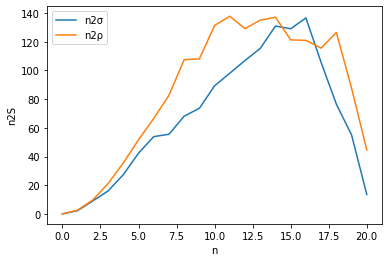

In [ ]:
surr_plt_lin = []
surr_plt = []
n_arr = []
for i in range (21):
  surr_plt_lin.append(W_surr_lin[i,i]*(i**2))
  surr_plt.append(W_surr[i,i]*(i**2))
  n_arr.append(i)
print(surr_plt)

plt.plot(n_arr, surr_plt, label='n2σ')
plt.plot(n_arr, surr_plt_lin, label='n2ρ')
leg = plt.legend(loc='upper left')
plt.xlabel('n')
plt.ylabel('n2S')
plt.show()

#this is a plot of the surrogates (SVD (n2σ)and non linear(n2ρ) SVD)

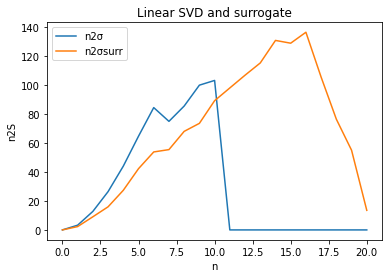

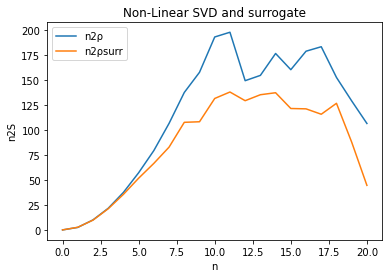

In [ ]:
plt.plot(n_arr, plt_arr, label='n2σ')
plt.plot(n_arr, surr_plt, label='n2σsurr')
leg = plt.legend(loc='upper left')
leg = plt.legend(loc='upper left')
plt.xlabel('n')
plt.ylabel('n2S')
plt.title('Linear SVD and surrogate')
plt.show()


plt.plot(n_arr, plt_arr_lin, label='n2ρ')
plt.plot(n_arr, surr_plt_lin, label='n2ρsurr')
leg = plt.legend(loc='upper left')
plt.title('Non-Linear SVD and surrogate')


plt.xlabel('n')
plt.ylabel('n2S')
plt.show()




###Henon Map


In [ ]:
#henon map
def henon_map(x, y, a=1.4, b=0.3):
	x_next = 1 - a * x ** 2 + y
	y_next = b * x
	return x_next, y_next
	


In [ ]:
# number of iterations and array initialization
steps = 100000
X = np.zeros(steps + 1)
Y = np.zeros(steps + 1)

# starting point
X[0], Y[0] = 0, 0

# add points to array
for i in range(steps):
	x_next, y_next = henon_map(X[i], Y[i])
	X[i+1] = x_next
	Y[i+1] = y_next

In [ ]:
print(X[0:20])
print(Y[0:20])

[ 0.          1.         -0.4         1.076      -0.7408864   0.55432228
  0.34755162  0.99718771 -0.28787117  1.18313858 -1.046105   -0.17712836
  0.64224426  0.36939272  1.0016419  -0.29378328  1.17966051 -1.03637347
 -0.1497998   0.65767199]
[ 0.          0.          0.3        -0.12        0.3228     -0.22226592
  0.16629668  0.10426548  0.29915631 -0.08636135  0.35494157 -0.3138315
 -0.05313851  0.19267328  0.11081782  0.30049257 -0.08813498  0.35389815
 -0.31091204 -0.04493994]


In [ ]:
G = np.zeros((7,7))
G[:,0] = 1

for i in range (1,4):
  G[:,i] = X[3-i:3-i+7]

G[:,4] = (X[0:7])**2
G[:,5] = (X[1:8])**2
G[:,6] = (X[0:7])*(X[1:8])


print(G)


[[ 1.         -0.4         1.          0.          0.          1.
   0.        ]
 [ 1.          1.076      -0.4         1.          1.          0.16
  -0.4       ]
 [ 1.         -0.7408864   1.076      -0.4         0.16        1.157776
  -0.4304    ]
 [ 1.          0.55432228 -0.7408864   1.076       1.157776    0.54891266
  -0.79719377]
 [ 1.          0.34755162  0.55432228 -0.7408864   0.54891266  0.30727319
  -0.41068984]
 [ 1.          0.99718771  0.34755162  0.55432228  0.30727319  0.12079213
   0.1926556 ]
 [ 1.         -0.28787117  0.99718771  0.34755162  0.12079213  0.99438333
   0.3465742 ]]


In [ ]:
# U, D, VT = np.linalg.svd(F)

# diag_mat = np.diag(D)


# # get dim of X
# W = np.zeros((F.shape[0], F.shape[1]))
# # populate Sigma with n x n diagonal matrix
# W[:F.shape[1], :F.shape[1]] = np.diag(D)

# print(W)

In [ ]:
# #preset criterion is 10^-6
# p = F.shape[1]
# if W[p-1, p-1]/W[0, 0] < 10**(-6):
#   W[p-1, p-1] = 0
W, VT= SVD_function(G)

In [ ]:
print(W)

[[3.6880997  0.         0.         0.         0.         0.
  0.        ]
 [0.         3.00726412 0.         0.         0.         0.
  0.        ]
 [0.         0.         1.27162095 0.         0.         0.
  0.        ]
 [0.         0.         0.         1.21824507 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.21352236 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.10780012
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


In [ ]:
if W[p-1, p-1] == 0:
  print(VT[p-1, :])

-4.96903995e-01 (1) + 4.96903995e-01 (Xn+2) + 0 (Xn+1) - 1.49071198e-01 (Xn) + 0 (Xn)^2 + 6.95665593e-01 (Xn+1)^2 + 0 (Xn*Xn+1) = 0

---


-10 + 10Xn+2 - 3Xn + 14(Xn+1)^2 = 0

---

 Xn+2 = 1 - 1.4(Xn+1)^2 + 0.3Xn



---
 Xn+1 = 1 - 1.4(Xn)^2 + Yn
 Yn+1 = 0.3Xn


---
Parameter a and b correctly estimated as 1.4 and 3



In [ ]:
x = logistic(3.842, 0.2, 10)

print(x)

[0.2, 0.6147200000000002, 0.9099366735871999, 0.3148592906566208, 0.8288074499717965, 0.5451247089589772, 0.9526767683841343, 0.17321174200947045, 0.550210647116617, 0.9508138988997736]


In [ ]:
G1 = np.zeros((5,5))

G1[:,0] = x[0:5]
G1[:,1] = x[2:7]
G1[:,2] = G1[:,0]**2
G1[:,3] = G1[:,0]**3 
G1[:,4] = G1[:,0]**4 



W_2, VT_2= SVD_function(G1)
print(W_2)
print(VT_2)


[[2.66401043 0.         0.         0.         0.        ]
 [0.         0.80044902 0.         0.         0.        ]
 [0.         0.         0.28878849 0.         0.        ]
 [0.         0.         0.         0.03447386 0.        ]
 [0.         0.         0.         0.         0.        ]]
[[-0.52668489 -0.58459003 -0.41639773 -0.34670454 -0.2954089 ]
 [-0.16129664  0.77964768 -0.35451844 -0.36129755 -0.33153226]
 [ 0.74611632 -0.21849199  0.02349621 -0.34642657 -0.52441229]
 [-0.36016551  0.0511716   0.67953114  0.16828591 -0.61447503]
 [-0.10088441  0.00683454  0.48848231 -0.7751958   0.3875979 ]]


In [ ]:
if W_2[4, 4] == 0:
  print(VT_2[4, :])
  

[-0.10088441  0.00683454  0.48848231 -0.7751958   0.3875979 ]


In [ ]:
#dividing by 0.00683454 so that the coeffecient of Xn+2 is 1
new_coeff = []
new_coeff = (VT_2[4, :])/VT_2[4, 1]
print(new_coeff)

[ -14.760964      1.           71.47258769 -113.42324738   56.71162369]


In [ ]:
#Thus we get  λ^2 as 14.760964
lamba = math.sqrt(14.760964)
print(lamba)

3.842


###Noisy Results



In [ ]:
# import numpy as np
# import scipy.io

# def signaltonoise(a, axis=0, ddof=0):
#     a = np.asanyarray(a)
#     m = a.mean(axis)
#     sd = a.std(axis=axis, ddof=ddof)
#     return np.where(sd == 0, 0, m/sd)

# dat = scipy.io.loadmat('./data.mat')
# arr = dat['dn']
# snr = signaltonoise(arr)

###Van der Pol Equation

In [ ]:
from scipy import linspace
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def vdp(t, z):
    x, y = z
    return [y, mu*(1 - x**2)*y - 2.895*x]

a, b = 0, 10

mu = 0.237

t = np.linspace(a, b, 500)


sol = solve_ivp(vdp, [a, b], [1, 0], t_eval=t)


print(sol.y[1][:10])


[ 0.         -0.05800487 -0.11594342 -0.17375034 -0.2313637  -0.28872426
 -0.34577436 -0.40245792 -0.45872044 -0.51450901]


In [ ]:
vdp_data = sol.y[0]
vdp_data[:12]


array([1.        , 0.99941873, 0.9976756 , 0.99477312, 0.99071493,
       0.98550541, 0.97914999, 0.97165517, 0.96302849, 0.95327858,
       0.94241512, 0.93044882])

In [ ]:
F_embed = np.zeros((10,10))

F_embed[:,0] = vdp_data[2:12]  #X3
F_embed[:,1] = vdp_data[0:10] #X1
F_embed[:,2] = vdp_data[0:10] #X2
F_embed[:,3] =  (F_embed[:,1])**2  
F_embed[:,4] =  (F_embed[:,2])**2
F_embed[:,5] =  (F_embed[:,1])*(F_embed[:,2])
F_embed[:,6] =  (F_embed[:,1])**3
F_embed[:,7] =  (F_embed[:,2])**3
F_embed[:,8] = ((F_embed[:,1])**2)*(F_embed[:,2])
F_embed[:,9] = ((F_embed[:,2])**2)*(F_embed[:,1])

print(F_embed)

my_F = np.zeros((6,6))
my_F[:,0] = vdp_data[2:8]  #X3
my_F[:,1] = vdp_data[0:6] #X1
my_F[:,2] = vdp_data[0:6] #X2
my_F[:,3] =  (my_F[:,1])**2  
my_F[:,4] =  (my_F[:,2])**2
my_F[:,5] =  (my_F[:,1])*(my_F[:,2])


[[0.9976756  1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.99477312 0.99941873 0.99941873 0.9988378  0.9988378  0.9988378
  0.99825721 0.99825721 0.99825721 0.99825721]
 [0.99071493 0.9976756  0.9976756  0.99535661 0.99535661 0.99535661
  0.993043   0.993043   0.993043   0.993043  ]
 [0.98550541 0.99477312 0.99477312 0.98957356 0.98957356 0.98957356
  0.98440117 0.98440117 0.98440117 0.98440117]
 [0.97914999 0.99071493 0.99071493 0.98151607 0.98151607 0.98151607
  0.97240263 0.97240263 0.97240263 0.97240263]
 [0.97165517 0.98550541 0.98550541 0.97122091 0.97122091 0.97122091
  0.95714346 0.95714346 0.95714346 0.95714346]
 [0.96302849 0.97914999 0.97914999 0.9587347  0.9587347  0.9587347
  0.93874507 0.93874507 0.93874507 0.93874507]
 [0.95327858 0.97165517 0.97165517 0.94411376 0.94411376 0.94411376
  0.91735301 0.91735301 0.91735301 0.91735301]
 [0.94241512 0.96302849 0.96302849 0.92742388 0.92742388 0.92742388
  0.89313562 0.8931356

In [ ]:
W_final, VT_final = SVD_function(F_embed)
#print(W_final)

my_w, my_VT = SVD_function(my_F)
print(my_w)
print(my_VT)

[[5.94443112e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.38750438e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.44045956e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[-4.06550982e-01 -4.09876353e-01 -4.09876353e-01 -4.07725009e-01
  -4.07725009e-01 -4.07725009e-01]
 [ 1.18174101e-01 -5.65567006e-01 -5.65567006e-01  3.39756190e-01
   3.39756190e-01  3.39756190e-01]
 [ 9.05953189e-01 -1.10160505e-01 -1.10160505e-01 -2.27287003e-01
  -2.27287003e-01 -2.27287003e-01]
 [ 0.00000000e+00  7.07106781e-01 -7.07106781e-01 -2.22044605e-16
  -1.11022302e-16 -1.11022302e-16]
 [ 0.00000000e+00 -1.2062